In [7]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 

In [8]:
class Perceptron(object):
    def __init__(self, number_of_inputs, epochs, eta):
        self.weights = np.random.rand(number_of_inputs + 1)
        self.epochs = epochs 
        self.eta = eta
           
    def activation_fn(self, x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, inputs):
        x = np.array(inputs, ndmin=2) 
        
        x = np.insert(x, 0, 1, axis=1) 
        z = np.dot(x, self.weights.T) 
        return self.activation_fn(z) 

    def loss_fn(self, y, y_hat):
        return (y - y_hat)**2
    
    def fit(self, training_inputs, labels):
        for _ in range(self.epochs):
            
            for i in range(training_inputs.shape[0]):
                x = np.insert(training_inputs[i], 0, 1)
                y = labels[i]
                y_hat = self.predict(training_inputs[i])
                l = self.loss_fn(y, y_hat)
                
                grad = -2 * (y - y_hat) * y_hat * (1 - y_hat) * x
                weights_d = self.eta * grad
                self.weights = self.weights - weights_d
                
    def status(self):
        print("Perceptron weights: ", self.weights)
        
    def getWeights(self):
        return self.weights

Perceptron weights:  [-1.92028131  1.18276144  1.11405373]
[0.1278302]
[-1.92028131  1.18276144  1.11405373]


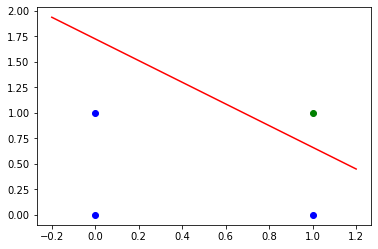

In [9]:
train_input = np.array([
                        [0, 0],
                        [0, 1],
                        [1, 0],
                        [1, 1]
                        ])

labels_AND = np.array([0, 0, 0, 1])

perceptron_AND = Perceptron(2, 100, 0.1)
perceptron_AND.fit(train_input, labels_AND)
perceptron_AND.status()
print(perceptron_AND.predict(train_input[0]))
perceptron_AND.predict(train_input)

w = perceptron_AND.getWeights()
print(w)
m = (-w[1] / w[2])
b = (-w[0] / w[2])

fig = plt.figure(1)
ax = fig.add_subplot(111)
x = np.linspace(-0.2, 1.2)
            
ax.plot(x, (m*x+b), '-r')
ax.plot(train_input[labels_AND==0][:,0], train_input[labels_AND==0][:,1], 'bo')
ax.plot(train_input[labels_AND==1][:,0], train_input[labels_AND==1][:,1], 'go')
plt.show()

Perceptron weights:  [-0.42339448  1.7995967   1.75858688]
[-0.42339448  1.7995967   1.75858688]


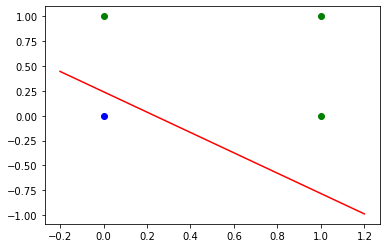

In [10]:
labels_OR = np.array([0, 1, 1, 1])

perceptron_OR = Perceptron(2, 100, 0.1)
perceptron_OR.fit(train_input, labels_OR)
perceptron_OR.status()
perceptron_OR.predict(train_input)

w = perceptron_OR.getWeights()
print(w)
m = (-w[1] / w[2])
b = (-w[0] / w[2])

fig = plt.figure(1)
ax = fig.add_subplot(111)
x = np.linspace(-0.2, 1.2)
            
ax.plot(x, (m*x+b), '-r')
ax.plot(train_input[labels_OR==0][:,0], train_input[labels_OR==0][:,1], 'bo')
ax.plot(train_input[labels_OR==1][:,0], train_input[labels_OR==1][:,1], 'go')
plt.show()